# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [10]:
import pandas as pd
import seaborn as sns

In [12]:
sd = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

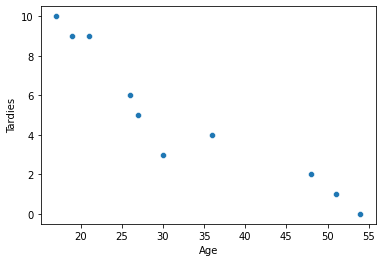

In [13]:
sns.scatterplot(x=sd["Age"], y=sd["Tardies"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# we can roughly see an inverse correlation: the higer the "age" value is, the lower the number of tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

# covariance:

In [15]:
sd[["Age", "Tardies"]].cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


# correlation:

In [14]:
sd.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
#covariance shows relation between age and tardies but in absolute quantities, wich is not very useful (but it is useful in the case of each variable's own variance)
#on the other hand, correlation matrix shows normalised values (between 0 and 1) for the relationship between variables, wich is very useful.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

# building my own model:

In [27]:
sd["my_model"] = -0.25 * sd.Age + 14

Plot your regression model on your scatter plot.

In [20]:
from matplotlib import pyplot as plt

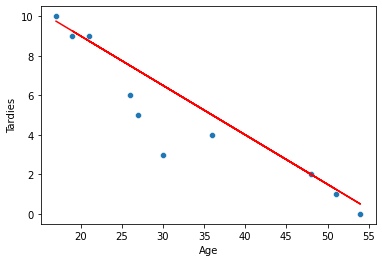

In [30]:
sns.scatterplot(x=sd["Age"], y=sd["Tardies"])
plt.plot(sd.Age, sd["my_model"], color='r');

# ...and comparing with seaborn´s regression model:

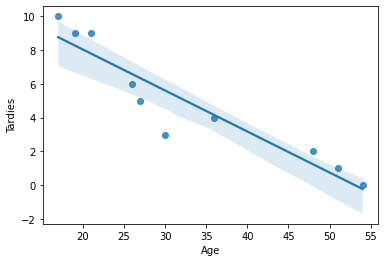

In [16]:
sns.regplot(x="Age", y="Tardies", data=sd);

In [34]:
#pip install sklearn

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X = sd[["Age"]], y = sd.Tardies)

LinearRegression()

In [38]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(round(beta_0,2), round(beta_1,2))

12.89 -0.24


In [ ]:
#I had estimated with my model values of 14 and -0.25 :)

In [43]:
#pip install statsmodels

In [42]:
import statsmodels.formula.api as smf

In [46]:
results = smf.ols("Tardies ~ Age", data = sd).fit()
results.summary()

/home/a_romegar/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           5.57e-05
Time:                        17:05:35   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
#according to R-square analysis, 88% of tasrdies can be explainded due to Age.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [47]:
data = pd.read_csv("vehicles.csv", index_col=0)

In [58]:
data.drop(['Model','Engine Displacement','Transmission','Drivetrain', 'Vehicle Class', 'Fuel Type','City MPG', 'Highway MPG'], axis=1,inplace=True)

In [61]:
data.rename(columns={"Fuel Barrels/Year": "Fuel_Barrels_per_Year",
                     "Combined MPG": "Combined_MPG",
                    "CO2 Emission Grams/Mile": "CO2_Emission_Grams_per_Mile",
                    "Fuel Cost/Year": "Fuel_Cost_per_Year"},inplace=True)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [62]:
data.corr()

,Year,Cylinders,Fuel_Barrels_per_Year,Combined_MPG,CO2_Emission_Grams_per_Mile,Fuel_Cost_per_Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel_Barrels_per_Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2_Emission_Grams_per_Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel_Cost_per_Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [76]:
data.corr().loc["CO2_Emission_Grams_per_Mile"].sort_values(ascending=False)

CO2_Emission_Grams_per_Mile    1.000000
Fuel_Barrels_per_Year          0.986189
Fuel_Cost_per_Year             0.930865
Cylinders                      0.752393
Year                          -0.222300
Combined_MPG                  -0.926229
Name: CO2_Emission_Grams_per_Mile, dtype: float64

In [ ]:
# Fuel_Barrels_per_Year   and   Fuel_Cost_per_Year     have the strongest direct correlation
# Combined_MPG   has the stronger reverse correlation
# Year  has lower correlation

In [79]:
results = smf.ols("CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year", data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.973
Model:                                     OLS   Adj. R-squared:                  0.973
Method:                          Least Squares   F-statistic:                 1.275e+06
Date:                         Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                                 17:55:13   Log-Likelihood:            -1.5821e+05
No. Observations:                        35952   AIC:                         3.164e+05
Df Residuals:                            35950   BIC:                         3.164e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_Barrels_per_Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [53]:
lr.fit(X = data[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]], y = data['CO2 Emission Grams/Mile'])

LinearRegression()

In [54]:
lr.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [80]:
df = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

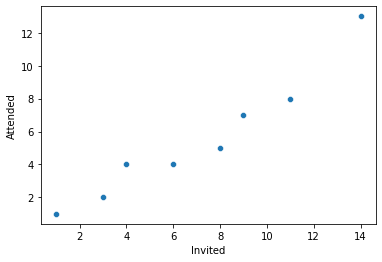

In [82]:
sns.scatterplot(x=df["Invited"], y=df["Attended"]);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

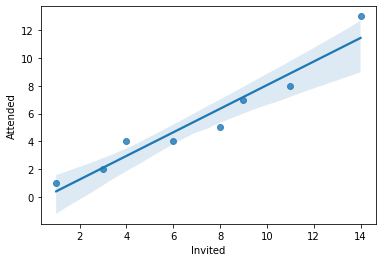

In [83]:
sns.regplot(x="Invited", y="Attended", data=df);

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [86]:
df

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [88]:
df2=df.drop([7])

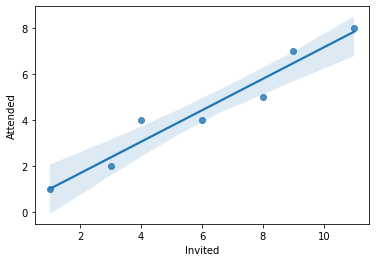

In [90]:
sns.regplot(x="Invited", y="Attended", data=df2);

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# It didnt change a lotafter removing the outlier